# Практическая работа №1

Выполнил студент группы М06-106н Кочетков Дмитрий Андреевич.

## Постановка задачи

Задача: реализовать алгоритм вычисления чисел Фибоначчи.

1.	программно реализовать вычисление наивного алгоритма решения задачи;
2.	программно реализовать вычисление оптимизированного алгоритм решения задачи;
3.	программно реализовать расчет времени выполнения наивного и оптимизированного алгоритмов решения задачи для заданного набора параметров;
4.	подобрать параметры для расчета времени выполнения наивного и оптимизированного алгоритмов таким образом, чтобы сложность выполнения алгоритмов возрастала;
5.	вычислить время выполнения наивного и оптимизированного алгоритмов для заданного набора параметров; внести полученные данные в таблицу;
6.	визуализировать полученные данные в виде двух графиков на одной координатной плоскости (по оси Ox – номер параметра, по оси Oy – время выполнения);
7.	сделать вывод.

In [ ]:
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt

## Наивный алгоритм

В наивном алгоритме $n$-е число Фибоначчи считается по определению с использованием рекурсии:
$$ F_n = F_{n-1} + F_{n-2} $$

In [ ]:
def naive_fibonacci(n):
    if n == 0:
        return 0

    if n == 1:
        return 1

    return naive_fibonacci(n-1) + naive_fibonacci(n-2)

In [ ]:
for i in range(10):
    print('F({}): {}'.format(i, naive_fibonacci(i)))

Оценим сложность данного алгоритма. Время его выполнения можно выразить как $ T(n) = T(n-1) + T(n-2) + O(1) $, ведь вычисление $n$-го числа Фибоначчи потребует вычисления $n-1$ и $n-2$ чисел Фибоначчи, а также проверки двух условий и возврат значения.

Тогда, учитывая, что $T(n-1) = 2 \cdot T(n-2) + 1$, получаем $ T(n) = T(n-1) + T(n-2) + O(1) = 2^k \cdot T(n-k) + (2^k-1) = O(2^n)$

## Оптимизированный алгоритм

Оптимизированный алгоритм использует матричное умножение. Число $F_n$ можно вычислить, пользуясь соотношением:

$$ \begin{pmatrix} 1 & 1 \\ 1 & 0 \end{pmatrix} ^ n = \begin{pmatrix} F_{n+1} & F_{n} \\ F_{n} & F_{n-1} \end{pmatrix}$$

In [ ]:
# Умножение двух матриц размера 2x2
def multiply(m1, m2):
    return [
        [m1[0][0] * m2[0][0] + m1[0][1] * m2[1][0], m1[0][0] * m2[0][1] + m1[0][1] * m2[1][1]],
        [m1[1][0] * m2[0][0] + m1[1][1] * m2[1][0], m1[1][0] * m2[0][1] + m1[1][1] * m2[1][1]]
    ]

# Возведение матрицы размера 2x2 в степень
def power(matrix, n):
    if n == 0 or n == 1:
        return matrix

    result = power(matrix, n // 2)
    result = multiply(result, result)
    if n % 2 != 0:
        result = multiply(result, matrix)

    return result

def efficient_fibonacci(n):
    m = [
        [1, 1],
        [1, 0]
    ]

    if n == 0:
        return 0
    return power(m, n-1)[0][0]

Функция `multiply` работает за $O(1)$, так как данная функция состоит из одной операции возврата значения, вычисляемого при помощи элементарных арифметических операций.

Функция `power` работает за $O(\log n)$, так как возведение в степень в данном случае производится не при помощи $n$ умножений, а при помощи 

Функция `efficient_fibonacci`, реализующая оптимизированный алгоритм вычисления $n$-го числа Фибоначчи, работает за $O(\log n)$, так как в ходе её выполнения соврешается три операции:

- выделение памяти под начальную матрицу размера 2x2;
- проверка условия на $n=0$;
- возврат элемента матрицы, высчитываемой функцией `power` за $O(\log n)$.

In [ ]:
for i in range(10):
    print('F({}): {}'.format(i, efficient_fibonacci(i)))

## Программный расчет времени выполнения

In [29]:
naive_algorithm_time = list()
efficient_algorithm_time = list()
n_max = 30

for n in range(1, n_max):
    start_time = time.time()
    naive_fibonacci(n)
    naive_algorithm_time.append(time.time() - start_time)

    start_time = time.time()
    efficient_fibonacci(n)
    efficient_algorithm_time.append(time.time() - start_time)

In [31]:
pd.DataFrame({'Naive': naive_algorithm_time, 'Effecient': efficient_algorithm_time})

,Naive,Effecient
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000501,0.000000
4,0.000000,0.000000
5,0.000000,0.000000
6,0.000000,0.000000
7,0.000000,0.000000
8,0.000000,0.000000
9,0.000000,0.000000


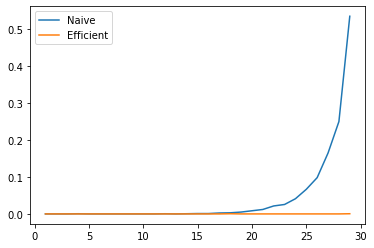

In [30]:
plt.plot(range(1, n_max), naive_algorithm_time, label = "Naive")
plt.plot(range(1, n_max), efficient_algorithm_time, label = "Efficient")
plt.legend()
plt.show()

## Вывод

В ходе практической работы №1 было проведено сравнение наивного и эффективного алгоритма для вычисления чисел Фибоначчи. Было рассчитано, что наивный алгоритм требует $O(2^n)$ времени, тогда как эффективный алгоритм работает за $O(\log n)$. Расчеты проверены на практике построением графика измеренного времени работы алгоритма.